In [1]:
import pandas as pd
from fbprophet import Prophet

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.

In [3]:
import platform
from pathlib import Path
if platform.system() == 'Darwin':
    data_path = Path('../data')
else:
    data_path = Path('C:/Projects/University/Semester 2 Projects/Energy-efficient Distributed Systems/energy_efficient_ds/Assignment P3/data')

In [44]:
def parse(x):
    return datetime.strptime(x, '%Y %m %d %H')

df = pd.read_csv(data_path / 'web_traffic_wikipedia_tiny.csv')  
df = df.transpose()
df = df.rename(columns=df.iloc[0]).drop(df.index[0])
df.reset_index(level=0, inplace=True)
df = df.rename(index=str, columns={"index": "date"})
# Select only 2 columns and rename them for quickstart example
df = df[['date','Google_zh.wikipedia.org_all-access_all-agents']]
df = df.rename(index=str, columns={"date": "ds", "Google_zh.wikipedia.org_all-access_all-agents": "y"})
df.head()

,ds,y
0,2015-07-01,1157
1,2015-07-02,1982
2,2015-07-03,2058
3,2015-07-04,1623
4,2015-07-05,1755


In [45]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\ProgramData\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [46]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1163,2018-09-06
1164,2018-09-07
1165,2018-09-08
1166,2018-09-09
1167,2018-09-10


In [47]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1163,2018-09-06,1104.129234,-5.152243,2145.568572
1164,2018-09-07,999.360144,-107.387694,2008.913345
1165,2018-09-08,893.410210,-234.689937,1927.674190
1166,2018-09-09,925.763187,-174.894276,1886.743005
1167,2018-09-10,1005.327763,-104.892705,2026.449552


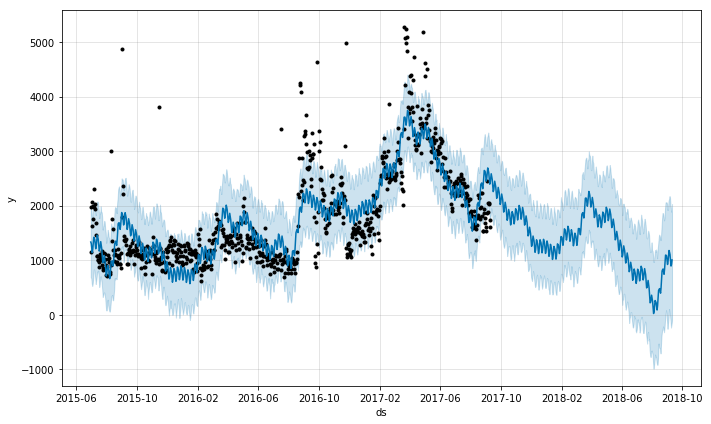

In [48]:
fig1 = m.plot(forecast)